Ciara Sikking 
Data Mining - Mar. 19, 2024
# Convert Images to Edge Histograms - Crop Images

In [76]:
# Import necessary packages
import skimage
import xml.etree.ElementTree as ET
import glob
import os
from PIL import Image
from pathlib import Path

# Define bounding boxes method
def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
    return bbox

# Define global variables
dog_images = glob.glob('/Users/ciarasikking/Data_Mining_Assignment2/StanfordDogs/Images/*/*')
breeds = glob.glob('/Users/ciarasikking/Data_Mining_Assignment2/StanfordDogs/Annotation/*')
annotations = glob.glob('/Users/ciarasikking/Data_Mining_Assignment2/StanfordDogs/Annotation/*/*')

# Define images method
def get_image(annot):
    img_path = '/Users/ciarasikking/Data_Mining_Assignment2/StanfordDogs/Images/'
    file = annot.split('/')
    img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
    return img_filename

# Crop images and save in a new folder titled 'Cropped'
for i in range(len(dog_images)):
    bbox = get_bounding_boxes(annotations[i])
    dog = get_image(annotations[i])
    im = Image.open(dog)
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((128,128), Image.ANTIALIAS)
        new_path = dog.replace('/Users/ciarasikking/Data_Mining_Assignment2/StanfordDogs/Images/','./Cropped/')
        new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
        im2=im2.convert('RGB')
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)

# Convert Images to Edge Histograms - Convert to Gray and Edge Histograms

In [77]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage.util import compare_images
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MaxAbsScaler, RobustScaler, 
Normalizer, QuantileTransformer, PowerTransformer, MinMaxScaler)
from mpl_toolkits.mplot3d import Axes3D

imgExtension = ['jpg'] 
allImages = list()

def im2gray(img):
    gray = np.dot(img[...,0:3],[0.299,0.587,0.114])
    return gray 

directories = ['/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02086910-papillon',
              '/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02101556-clumber',
              '/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02113712-miniature_poodle',
              '/Users/ciarasikking/Data_Mining_Assignment2/Cropped/n02113978-Mexican_hairless']

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

i = 0
image_list = []
gray_image_list = []
edge_hist_list = []

# Separate classes 
dir_1 = directories[0]
dir_2 = directories[1]
dir_3 = directories[2]
dir_4 = directories[3]
class_1 = os.listdir(dir_1)
class_2 = os.listdir(dir_2)
class_3 = os.listdir(dir_3)
class_4 = os.listdir(dir_4)

edge_hist_pap = []
edge_hist_clum = []
edge_hist_minp = []
edge_hist_mexh = []

# Convert each image in each class to edge histograms 
for im in class_1:
    read_image = plt.imread(dir_1 + '/' + im)
    gray_image = im2gray(read_image)
    
    angle_sobel = angle(filters.sobel_h(gray_image),filters.sobel_v(gray_image))
    
    hist, bins = skimage.exposure.histogram(angle_sobel, nbins=36, normalize=False)
    edge_hist_pap.append(hist)
    
for im2 in class_2:
    read_image2 = plt.imread(dir_2 + '/' + im2)
    gray_image2 = im2gray(read_image2)
    
    angle_sobel2 = angle(filters.sobel_h(gray_image2),filters.sobel_v(gray_image2))
    
    hist2, bins2 = skimage.exposure.histogram(angle_sobel2, nbins=36, normalize=False)
    edge_hist_clum.append(hist2)
    
for im3 in class_3:
    read_image3 = plt.imread(dir_3 + '/' + im3)
    gray_image3 = im2gray(read_image3)
    
    angle_sobel3 = angle(filters.sobel_h(gray_image3),filters.sobel_v(gray_image3))
    
    hist3, bins3 = skimage.exposure.histogram(angle_sobel3, nbins=36, normalize=False)
    edge_hist_minp.append(hist3)
    
for im4 in class_4:
    read_image4 = plt.imread(dir_4 + '/' + im4)
    gray_image4 = im2gray(read_image4)
    
    angle_sobel4 = angle(filters.sobel_h(gray_image4),filters.sobel_v(gray_image4))
    
    hist4, bins4 = skimage.exposure.histogram(angle_sobel4, nbins=36, normalize=False)
    edge_hist_mexh.append(hist4)

# Split images into Training/Test Sets

In [78]:
import pandas as pd 
from sklearn.model_selection import train_test_split 

labels_pap = ["papillon"] * len(edge_hist_pap)
labels_clum = ["clumber"] * len(edge_hist_clum)
labels_minp = ["miniature poodle"] * len(edge_hist_minp)
labels_mexh = ["mexican hairless"] * len(edge_hist_mexh)

labels = labels_pap + labels_clum + labels_minp + labels_mexh

data = edge_hist_pap + edge_hist_clum + edge_hist_minp + edge_hist_mexh

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=104, test_size=0.20, shuffle=True)

Standardize the training set

In [79]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data_train)

data_train_mean = scaler.mean_

data_train_stdev = scaler.scale_

data_train_scaled = scaler.transform(data_train)

data_test_scaled = (data_test - data_train_mean)/data_train_stdev

# Perform a standard 5-fold cross validation

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# k = 1
print('For k = 1')
knn = KNeighborsClassifier(n_neighbors=1)

knn = knn.fit(data_train_scaled, labels_train)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 3
print('For k = 3')
knn = KNeighborsClassifier(n_neighbors= 3)

knn = knn.fit(data_train_scaled, labels_train)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 5
print('For k = 5')
knn = KNeighborsClassifier(n_neighbors= 5)

knn = knn.fit(data_train_scaled, labels_train)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 7
print('For k = 7')
knn = KNeighborsClassifier(n_neighbors= 7)

knn = knn.fit(data_train_scaled, labels_train)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 10 
print('For k = 10')
knn = KNeighborsClassifier(n_neighbors= 10)

knn = knn.fit(data_train_scaled, labels_train)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 20 
print('For k = 20')
knn = KNeighborsClassifier(n_neighbors= 20)

knn = knn.fit(data_train_scaled, labels_train)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

For k = 1
Cross Validation Scores:  [0.29464286 0.36607143 0.27678571 0.33928571 0.32142857]
Average CV Score:  0.3196428571428572
Number of CV Scores used in Average:  5
Error 0.6803571428571429
For k = 3
Cross Validation Scores:  [0.28571429 0.30357143 0.35714286 0.35714286 0.28571429]
Average CV Score:  0.3178571428571429
Number of CV Scores used in Average:  5
Error 0.6821428571428572
For k = 5
Cross Validation Scores:  [0.27678571 0.29464286 0.36607143 0.36607143 0.29464286]
Average CV Score:  0.3196428571428572
Number of CV Scores used in Average:  5
Error 0.6803571428571429
For k = 7
Cross Validation Scores:  [0.28571429 0.30357143 0.375      0.34821429 0.27678571]
Average CV Score:  0.3178571428571429
Number of CV Scores used in Average:  5
Error 0.6821428571428572
For k = 10
Cross Validation Scores:  [0.29464286 0.34821429 0.33035714 0.375      0.25892857]
Average CV Score:  0.3214285714285714
Number of CV Scores used in Average:  5
Error 0.6785714285714286
For k = 20
Cross Va

# Perform a stratified 5-fold cross validation

In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# k = 1
print('For k = 1')
knn = KNeighborsClassifier(n_neighbors=1)

knn = knn.fit(data_train_scaled, labels_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 3
print('For k = 3')
knn = KNeighborsClassifier(n_neighbors= 3)

knn = knn.fit(data_train_scaled, labels_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 5
print('For k = 5')
knn = KNeighborsClassifier(n_neighbors= 5)

knn = knn.fit(data_train_scaled, labels_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 7
print('For k = 7')
knn = KNeighborsClassifier(n_neighbors= 7)

knn = knn.fit(data_train_scaled, labels_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 10 
print('For k = 10')
knn = KNeighborsClassifier(n_neighbors= 10)

knn = knn.fit(data_train_scaled, labels_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

# k = 20 
print('For k = 20')
knn = KNeighborsClassifier(n_neighbors= 20)

knn = knn.fit(data_train_scaled, labels_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

For k = 1
Cross Validation Scores:  [0.28571429 0.375      0.25       0.32142857 0.33928571]
Average CV Score:  0.31428571428571433
Number of CV Scores used in Average:  5
Error 0.6857142857142857
For k = 3
Cross Validation Scores:  [0.29464286 0.30357143 0.3125     0.34821429 0.30357143]
Average CV Score:  0.3125
Number of CV Scores used in Average:  5
Error 0.6875
For k = 5
Cross Validation Scores:  [0.25       0.33928571 0.34821429 0.35714286 0.34821429]
Average CV Score:  0.32857142857142857
Number of CV Scores used in Average:  5
Error 0.6714285714285715
For k = 7
Cross Validation Scores:  [0.29464286 0.32142857 0.36607143 0.39285714 0.32142857]
Average CV Score:  0.3392857142857143
Number of CV Scores used in Average:  5
Error 0.6607142857142857
For k = 10
Cross Validation Scores:  [0.30357143 0.375      0.33035714 0.34821429 0.28571429]
Average CV Score:  0.32857142857142857
Number of CV Scores used in Average:  5
Error 0.6714285714285715
For k = 20
Cross Validation Scores:  [0.

# Graph

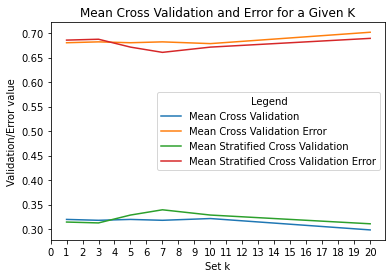

In [82]:
import matplotlib.pyplot as plt
import numpy as np 

# define data values
k = np.array([1, 3, 5, 7, 10, 20])
cross_val_scores =  np.array([0.3196428571428572, 0.3178571428571429, 0.3196428571428572, 0.3178571428571429, 0.3214285714285714, 0.29821428571428565])
cross_val_errors = np.array([0.6803571428571429, 0.6821428571428572, 0.6803571428571429, 0.6821428571428572, 0.6785714285714286, 0.7017857142857143])
st_cross_val_scores = np.array([0.31428571428571433, 0.3125, 0.32857142857142857, 0.3392857142857143, 0.32857142857142857, 0.31071428571428567])
st_cross_val_errors = np.array([0.6857142857142857, 0.6875, 0.6714285714285715, 0.6607142857142857, 0.6714285714285715, 0.6892857142857143])

plt.plot(k, cross_val_scores, label = "Mean Cross Validation")
plt.plot(k, cross_val_errors, label = "Mean Cross Validation Error")
plt.plot(k, st_cross_val_scores, label = "Mean Stratified Cross Validation")
plt.plot(k, st_cross_val_errors, label = "Mean Stratified Cross Validation Error")

plt.xlabel("Set k")
plt.ylabel("Validation/Error value")

# Add a title to a legend 
plt.legend(title = "Legend") 
plt.title("Mean Cross Validation and Error for a Given K") 
plt.xticks(np.arange(0, 21, step=1))
plt.show() 




For the standard cross validation error, k = 10 has the lowest mean error. For the stratified cross validation error, k = 7 has the lowest mean error. 

The k nearest neighbor classifier decreases in complexity as k increases.

There is underfitting when k < 3 because the error is not improving and overfitting when k > 7 because the error gets worse. 

# Test Dataset Error

In [83]:
# k = 7
print('For k = 7')
knn = KNeighborsClassifier(n_neighbors= 7)

knn = knn.fit(data_test_scaled, labels_test)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, data_test_scaled, labels_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

print('For k = 7')
knn = KNeighborsClassifier(n_neighbors= 7)

knn = knn.fit(data_test_scaled, labels_test)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn, data_test_scaled, labels_test, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

For k = 7
Cross Validation Scores:  [0.5        0.14285714 0.42857143 0.28571429 0.35714286]
Average CV Score:  0.34285714285714286
Number of CV Scores used in Average:  5
Error 0.6571428571428571
For k = 7
Cross Validation Scores:  [0.5        0.17857143 0.35714286 0.25       0.35714286]
Average CV Score:  0.3285714285714286
Number of CV Scores used in Average:  5
Error 0.6714285714285714


For the standard cross validation error, the mean error is 0.657. For the stratified cross validation error, the mean error is 0.671. 

# Neural Network

/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Cross Validation Scores:  [0.25       0.41071429 0.28571429 0.33928571 0.36607143]
Average CV Score:  0.33035714285714285
Number of CV Scores used in Average:  5
Error 0.6696428571428572
Accuracy of MLPClassifier :  0.2857142857142857
F1 of MLPClassifier :  [0.11111111 0.21126761 0.10169492 0.13793103]


/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


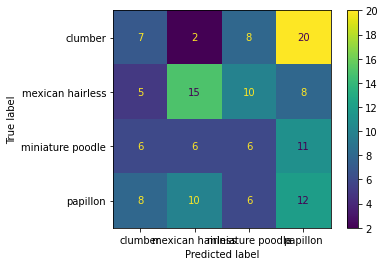

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

classifier = MLPClassifier(hidden_layer_sizes=(10,10,10))

nn = classifier.fit(data_train_scaled, labels_train)

y_pred = classifier.predict(data_test_scaled)

cm = confusion_matrix(y_pred, labels_test)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(nn, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

print("Accuracy of MLPClassifier :", '', accuracy(cm))

TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("F1 of MLPClassifier :", '', (precision*recall)/(precision + recall)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = nn.classes_)
disp.plot()

# 

# Support Vector Machine

/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Cross Validation Scores:  [0.26785714 0.40178571 0.29464286 0.33928571 0.33928571]
Average CV Score:  0.3285714285714286
Number of CV Scores used in Average:  5
Error 0.6714285714285714
Accuracy of LinearSVC :  0.32857142857142857
F1 of LinearSVC :  [0.14545455 0.2278481  0.08928571 0.16666667]


/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ciarasikking/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


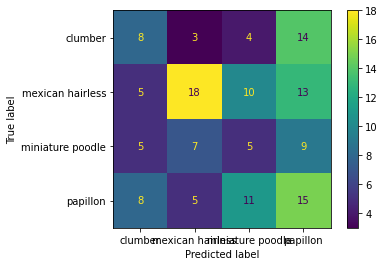

In [85]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import svm

svc = svm.LinearSVC()
svc.fit(data_train_scaled, labels_train)

pred = svc.predict(data_test_scaled)
cm = confusion_matrix(pred, labels_test)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(svc, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

print("Accuracy of LinearSVC :", '', accuracy(cm))

TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("F1 of LinearSVC :", '', (precision*recall)/(precision + recall)) 

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot()

# Random Forest Classifier

Cross Validation Scores:  [0.24107143 0.33928571 0.27678571 0.29464286 0.3125    ]
Average CV Score:  0.29285714285714287
Number of CV Scores used in Average:  5
Error 0.7071428571428571
Accuracy of RandomForestClassifier :  0.42142857142857143
F1 of RandomForestClassifier :  [0.18181818 0.23611111 0.16949153 0.23404255]


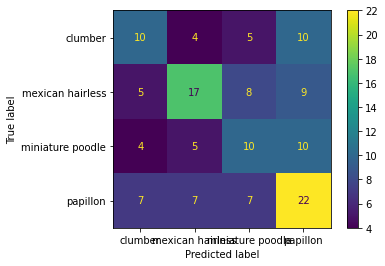

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_estimators = 100) 
rfc.fit(data_train_scaled, labels_train)

pred = rfc.predict(data_test_scaled) 

cm = confusion_matrix(pred, labels_test)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(rfc, data_train_scaled, labels_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print("Error", 1 - scores.mean())

print("Accuracy of RandomForestClassifier :", '', accuracy(cm))

TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("F1 of RandomForestClassifier :", '', (precision*recall)/(precision + recall)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rfc.classes_)
disp.plot()

# Performance Comparison

Based on the confusion matrices alone, the Neural Network model seems to be the best method because prediction for each class falls at about average whereas in other models even if one class is predicted very well, another class may have very poor prediction

Based on the mean validation accuracies, the Neural Network model seems to be the best method.

By computing the accuracy on the test set, the Random Forest Classifier seemed to be the best method. 

The F1 scores for the Random Forest Classifier are higher for each class than the other methods. So based on F1 score this seems to be the best model.